In [1]:
import numpy as np
import scipy
import sklearn
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture,BayesianGaussianMixture

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['image.cmap'] = 'Greys'
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False



import sys,os,pdb,copy,pickle
from importlib import reload
# import pynapple as nap

sys.path.append('/mnt/home/szheng/projects/seq_detection2/code')
sys.path.append('/mnt/home/szheng/projects/util_code')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis/scripts')
sys.path.append('/mnt/home/szheng/projects/cluster_spikes')
sys.path.append('/mnt/home/szheng/projects/place_variability/code')
import data_prep_new as dpn
import place_cell_analysis as pa
import plot_helper as ph
import preprocess as prep
import nmf_analysis as na
import nmf_plot as nmfp
reload(na)

import raster_new as rn
import data_prep_pyn as dpp


import change_point_analysis as cpa
import change_point_plot as cpp

import place_field_analysis as pf

import switch_analysis_one_session as saos
reload(saos)

import process_central_arm as pca 
import change_point_analysis_central_arm_seperate as cpacas

import misc
reload(misc)
from misc import get_nth_key, get_nth_val

67 sessions!
67 sessions!


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
import matplotlib.pyplot as plt

# Set default figure size
plt.rcParams['figure.figsize'] = (3, 2)  # width, height in inches

# Set default font sizes
plt.rcParams['font.size'] = 10  # Default font size
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

In [3]:
import matplotlib
matplotlib.rcParams['svg.fonttype'] = 'none'

In [4]:

figdir = '/mnt/home/szheng/ceph/place_variability/fig/paper/suppfigure_validity_of_framework'
misc.get_or_create_subdir(figdir)
data_dir = '/mnt/home/szheng/ceph/place_variability/data/paper'
misc.get_or_create_subdir(data_dir)


/mnt/home/szheng/ceph/place_variability/fig/paper/suppfigure_validity_of_framework made!


'/mnt/home/szheng/ceph/place_variability/data/paper'

In [82]:
import ruptures as rpt

In [110]:
# sim examples
##continuous:
n_repeat = 100
signal_true = np.exp(-np.arange(30)/2)
test_signal=signal_true[None,:] + np.random.normal(size=(n_repeat,30)) * 0.1
## discrete



# n_samples, n_dims, sigma = 30, 1, 2
# n_bkps = 1  # number of breakpoints
# signal, bkps = rpt.pw_constant(n_samples, n_dims, n_bkps, noise_std=sigma)
# test_signal = signal.T



In [111]:
test_signal.shape

(100, 30)

In [112]:
import step_vs_gradual_analysis as svga
ncpts = 10
xx = test_signal[0]
r2_reg,xx_pred_reg=svga.fit_poly_regress_get_r2(xx,order=ncpts,cost='l2',verbose=False)
r2_step,xx_pred_step=svga.fit_cpd_get_r2(xx,ncpts,cost='l2',min_size=2)
print(r2_reg)
print(r2_step)

0.9215986885191138
0.9152064622806407


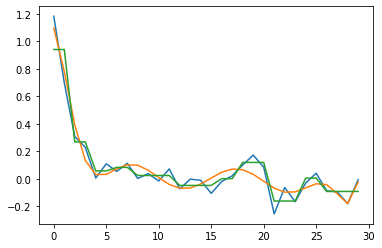

In [113]:
fig,ax=plt.subplots()
# ax.plot(signal_true,label='Noiseless data')
ax.plot(test_signal[0],label='Data')
ax.plot(xx_pred_reg,label='Fitted regression')
ax.plot(xx_pred_step,label='Fitted CPM')

([25, 30], 0.7832895102766558)


0.7038174785609954

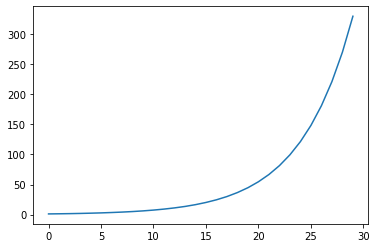

In [65]:
import step_vs_gradual_analysis_population as svgap
test_signal=np.exp(np.arange(30)/5) + np.random.normal(size=30) * 0.01#0.5
test_signal = test_signal[:,None]
print(svgap.fit_cpd_get_r2_multi_d(test_signal,1))
plt.plot(test_signal[:,0])
import statsmodels.api as sm
reg=sm.OLS(np.arange(30)[:,None],test_signal[:,0])
reg_res=reg.fit()
reg_res.rsquared

In [57]:
r2_step

0.8210463999086668

In [58]:
r2_reg

0.637790635713485

In [11]:
test_signal.shape

(100, 30)